In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
features = list()
with open ('features.txt') as f:
    features = [line.strip() for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


In [3]:
activity_map = {
    1: 'WALKING', 
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LYING'
}

# Obtain the train data

In [4]:
X_train = pd.read_csv('train/X_train.txt', delim_whitespace=True, header=None, names=features)
X_train['Subject'] = pd.read_csv('train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map(activity_map)

train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels

train['Subject'] = train['Subject'].astype('category')
train['Activity'] = train['Activity'].astype('category')
train['ActivityName'] = train['ActivityName'].astype('category')

print(train.shape)
train.sample()


(7352, 564)


,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)",Subject,Activity,ActivityName
550,0.287066,-0.005987,-0.108525,-0.993199,-0.940002,-0.989687,-0.994219,-0.941573,-0.988924,-0.932092,...,-0.011359,0.288514,-0.200173,0.001369,-0.691004,0.303107,0.078345,3,5,STANDING


In [5]:
X_test = pd.read_csv('test/X_test.txt', delim_whitespace=True, header=None, names=features)
X_test['Subject'] = pd.read_csv('test/subject_test.txt', header=None, squeeze=True)

y_test = pd.read_csv('test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map(activity_map)

test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels

test['Subject'] = test['Subject'].astype('category')
test['Activity'] = test['Activity'].astype('category')
test['ActivityName'] = test['ActivityName'].astype('category')

print(test.shape)
test.sample()


(2947, 564)


,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)",Subject,Activity,ActivityName
1981,0.27044,-0.003518,-0.141187,-0.301534,-0.201128,-0.540682,-0.373679,-0.244735,-0.505885,-0.002905,...,0.194481,-0.896146,0.974368,0.758593,-0.79074,0.226525,-0.051073,18,3,WALKING_DOWNSTAIRS


# Data Cleaning

In [6]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


In [7]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


In [8]:
import matplotlib.pyplot as plt
import seaborn as sb

sb.set_style('whitegrid')

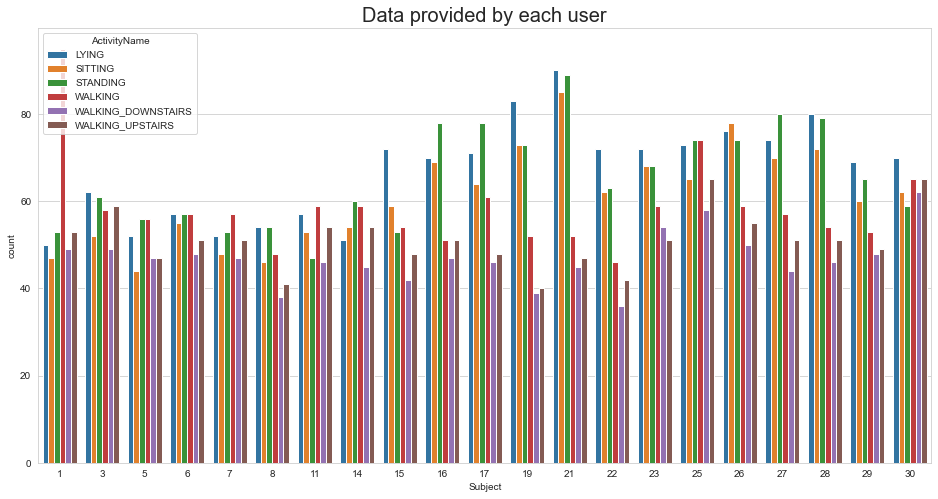

In [9]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sb.countplot(x='Subject',hue='ActivityName', data = train)
plt.show()

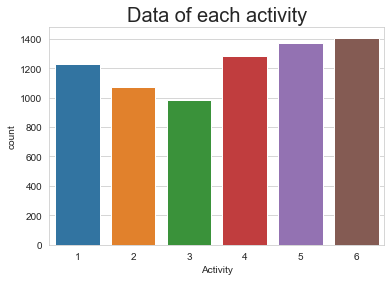

In [10]:
plt.title('Data of each activity', fontsize=20)
sb.countplot(train.Activity)
plt.show()

# Exploration

##### Domain Knowledge: 
 - Stationary activities and moving activites are significantly different in acceleration. 
 - Lying differs from others in orientation
 - Walking downstairs and walking upstairs will have y acceleration of opposite direction. 

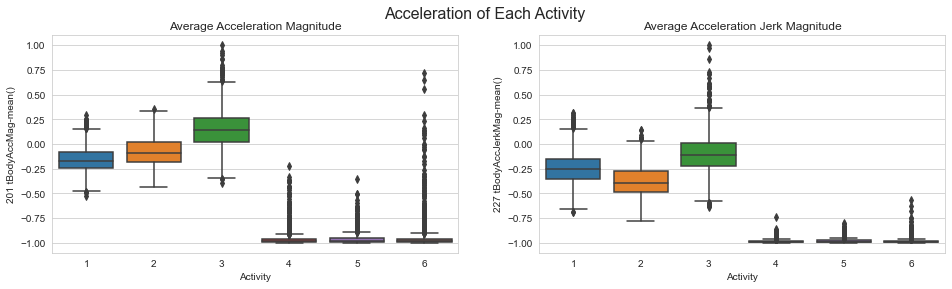

In [11]:
# Moving activities (1,2,3) should have higher tBodyAccMag/tBodyAccJerkMag than stationary activities (4,5,6)

fig, axes = plt.subplots(1, 2, figsize=(16,4))
fig.suptitle('Acceleration of Each Activity', fontsize=16)
sb.boxplot(ax=axes[0], x="Activity", y="201 tBodyAccMag-mean()", data=train)
axes[0].set_title('Average Acceleration Magnitude')
sb.boxplot(ax=axes[1], x="Activity", y="227 tBodyAccJerkMag-mean()", data=train)
axes[1].set_title('Average Acceleration Jerk Magnitude')
fig.show()

Acceleration jerk could effectively distinguish the moving and stationary activities. 
Also, we observed that the average acceleration jerk is higher in activity 3 (walking downstairs) than activity 2 (walking upstairs). This is because people generally walk downstair faster than climbing upstair. 

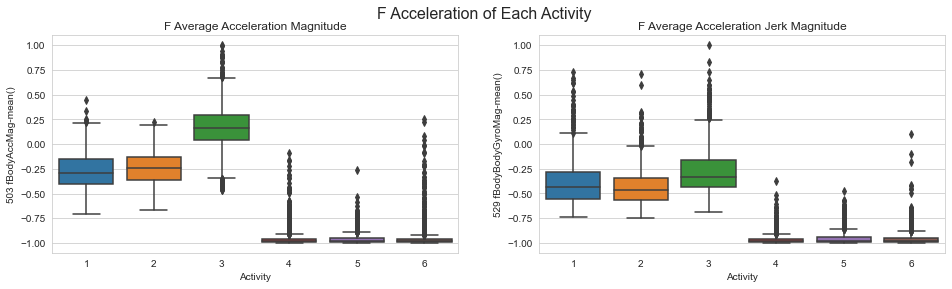

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))
fig.suptitle('F Acceleration of Each Activity', fontsize=16)
sb.boxplot(ax=axes[0], x="Activity", y="503 fBodyAccMag-mean()", data=train)   # add showFliers=False to not show those outliers
axes[0].set_title('F Average Acceleration Magnitude')
sb.boxplot(ax=axes[1], x="Activity", y="529 fBodyBodyGyroMag-mean()", data=train)
axes[1].set_title('F Average Acceleration Jerk Magnitude')
fig.show()

After Fourier Transform the data is less effective in distinguishing the moving and stationary activities. However, there is a bigger difference between 2 and 3 (walking upstairs and walking downstairs), so this transform may still be useful.  

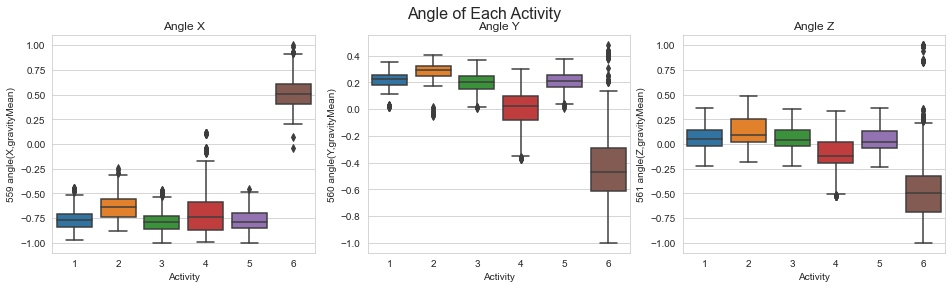

In [13]:
# lying should have different angle values from others

fig, axes = plt.subplots(1, 3, figsize=(16,4))
fig.suptitle('Angle of Each Activity', fontsize=16)
sb.boxplot(ax=axes[0], x="Activity", y="559 angle(X,gravityMean)", data=train)
axes[0].set_title('Angle X')
sb.boxplot(ax=axes[1], x="Activity", y="560 angle(Y,gravityMean)", data=train)
axes[1].set_title('Angle Y')
sb.boxplot(ax=axes[2], x="Activity", y="561 angle(Z,gravityMean)", data=train)
axes[2].set_title('Angle Z')
fig.show()

Angle X separates activity 6 (lying) from others. Angle Y separates 4 from 5 (standing and sitting). 

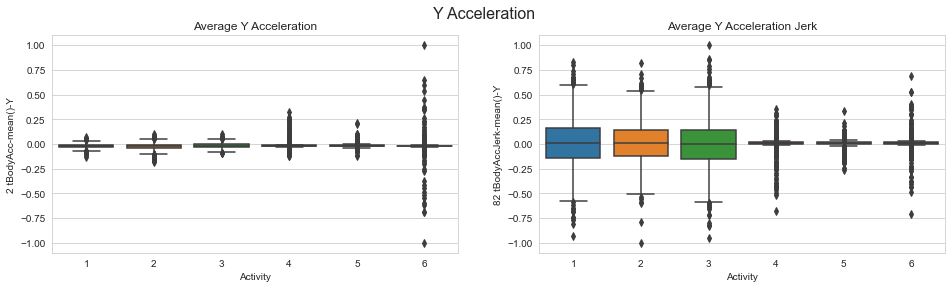

In [14]:
# walking downstairs should have different gravitational direction from walking upstairs

fig, axes = plt.subplots(1, 2, figsize=(16,4))
fig.suptitle('Y Acceleration', fontsize=16)
sb.boxplot(ax=axes[0], x="Activity", y="2 tBodyAcc-mean()-Y", data=train)
axes[0].set_title('Average Y Acceleration')
sb.boxplot(ax=axes[1], x="Activity", y="82 tBodyAccJerk-mean()-Y", data=train)
axes[1].set_title('Average Y Acceleration Jerk')

fig.show()

Emm not as expected. There isn't much difference between 2 and 3. 

**Conclusion:** 
1. It should be easy to distinguish moving activites (Walking, Walking Upstairs, Walking Downstairs) and stationary activities (Standing, Sitting, Lying). 
2. It should be easy to distinguish Lying from other activities. 
3. It should not be hard to distinguish Sitting from Standing. 
3. It may be harder to distinguish between Walking, Walking upstairs, and Walking downstairs. 

# Feature Selection

This is really required as there are 561 dimension in the dataset. <br/>Will experiment with Low Variance Filter, High Correlation Filter, PCA, ICA, and t-SNE?

**Reference** <br/>
https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/

In [15]:
# import numpy as np
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
# import seaborn as sns

In [16]:
# # performs t-sne with different perplexity values and their repective plots..

# def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
#     X_reduced = X_data
    
#     for index,perplexity in enumerate(perplexities):
#         # perform t-sne
#         print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
#         X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
#         print('Done..')
        
#         # prepare the data for seaborn         
#         print('Creating plot for this t-sne visualization..')
#         df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
#         # draw the plot in appropriate place in the grid
#         sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
#                    palette="Set1",markers=['^','v','s','o', '1','2'])
#         plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
#         img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
#         print('saving this plot as image in present working directory...')
#         plt.savefig(img_name)
#         plt.show()
#         print('Done')
    
#     return X_reduced

In [17]:
# X_pre_tsne = train.drop(['Subject', 'Activity','ActivityName'], axis=1)
# y_pre_tsne = train['ActivityName']
# reduced_data = perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

In [18]:
# print(reduced_data.shape)
# reduced_data

NameError: name 'reduced_data' is not defined

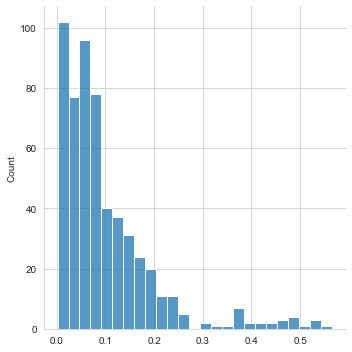

In [19]:
feature_variances = train.var()
sns.displot(feature_variances)

Many features have variances within the range of (0, 0.3), hence could try to do a Low Variance Filter to only use high variance features. 

In [34]:
feature_variance_list = list(zip(feature_variances,feature_variances.index))
high_variance_features = [x[1] for x in feature_variance_list if x[0]>0.2]
print("number of features left: {}".format(len(high_variance_features)))

number of features left: 59


# Model Building

### For plotting confusion matrix

In [22]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']



import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



### Generic function to run any model specified

In [23]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

### Method to print GridSearch attributes

In [24]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

### Preparation

In [ ]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [27]:
X_train_dropped = train.drop(['Subject', 'Activity', 'ActivityName'], axis=1)
X_test_dropped = test.drop(['Subject', 'Activity', 'ActivityName'], axis=1)

## Classification with SVM

As SVC is effective in high dimensional spaces, it looks suitable to this classification task (561 dimensions). 

### Linear SVC

In [25]:
from sklearn.svm import LinearSVC

training the model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:   45.5s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:50.581688


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00


---------------------
|      Accuracy      |
---------------------

    0.9670851713607058


--------------------
| Confusion Matrix |
--------------------

 [[496   0   0   0   0   0]
 [ 17 454   0   0   0   0]
 [  3   5 412   0   0   0]
 [  0   3   0 429  57   2]
 [  1   0   0   9 522   0]
 [  0   0   0   0   0 537]]


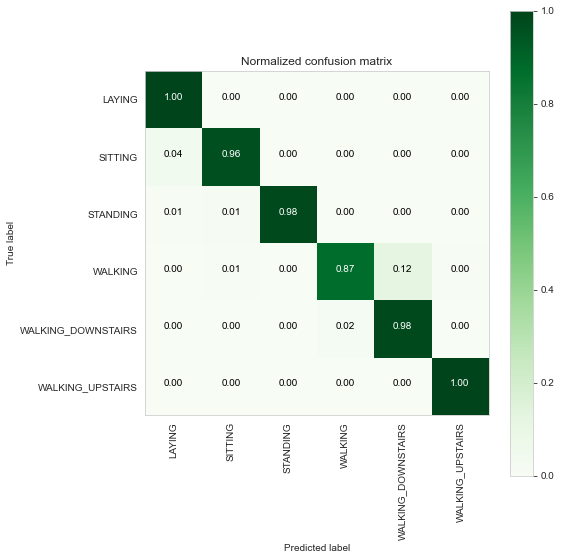

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           1       0.96      1.00      0.98       496
           2       0.98      0.96      0.97       471
           3       1.00      0.98      0.99       420
           4       0.98      0.87      0.92       491
           5       0.90      0.98      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.97      2947
   macro avg       0.97      0.97      0.97      2947
weighted avg       0.97      0.97      0.97      2947



In [28]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=8, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train_dropped, y_train, X_test_dropped, y_test, class_labels=labels)

In [29]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=0.5, tol=5e-05)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 0.5}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9427443961949159



### SVC with RBF Kernel

In [35]:
from sklearn.svm import SVC

training the model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:  1.0min finished


Done 
 

training_time(HH:MM:SS.ms) - 0:01:05.420445


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:02.587775


---------------------
|      Accuracy      |
---------------------

    0.9619952494061758


--------------------
| Confusion Matrix |
--------------------

 [[489   4   3   0   0   0]
 [ 19 450   2   0   0   0]
 [  4  18 398   0   0   0]
 [  0   2   0 441  48   0]
 [  0   0   0  12 520   0]
 [  0   0   0   0   0 537]]


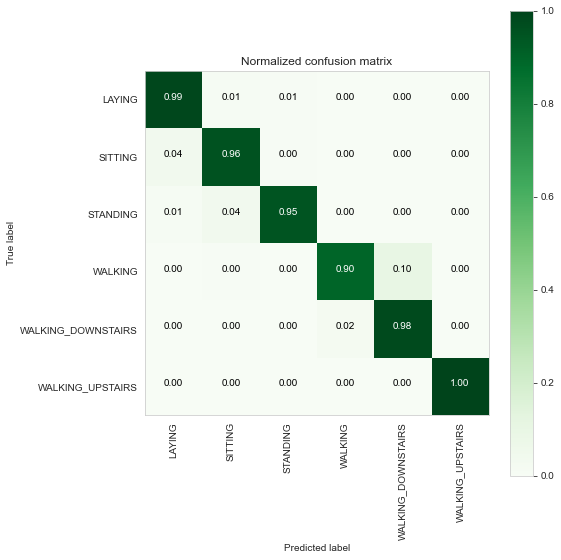

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           1       0.96      0.99      0.97       496
           2       0.95      0.96      0.95       471
           3       0.99      0.95      0.97       420
           4       0.97      0.90      0.93       491
           5       0.92      0.98      0.95       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [38]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
rbf_svc = SVC(tol=0.00005)
rbf_svc_grid = GridSearchCV(rbf_svc, param_grid=parameters, n_jobs=8, verbose=1)
rbf_svc_grid_results = perform_model(rbf_svc_grid, X_train_dropped, y_train, X_test_dropped, y_test, class_labels=labels)

In [40]:
print_grid_search_attributes(rbf_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=16, tol=5e-05)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 16}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.945191618455676



The accuracy drops slightly if compared to linear SVC. Probably means that the classification plane is not polynomial. 

## Classification with Logistic Regression

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  21 out of  36 | elapsed:    6.2s remaining:    4.4s
[Parallel(n_jobs=8)]: Done  36 out of  36 | elapsed:   13.0s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:15.246544


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.015611


---------------------
|      Accuracy      |
---------------------

    0.9579233118425518


--------------------
| Confusion Matrix |
--------------------

 [[492   1   3   0   0   0]
 [ 25 444   2   0   0   0]
 [  4  13 403   0   0   0]
 [  0   3   0 431  57   0]
 [  0   0   0  16 516   0]
 [  0   0   0   0   0 537]]


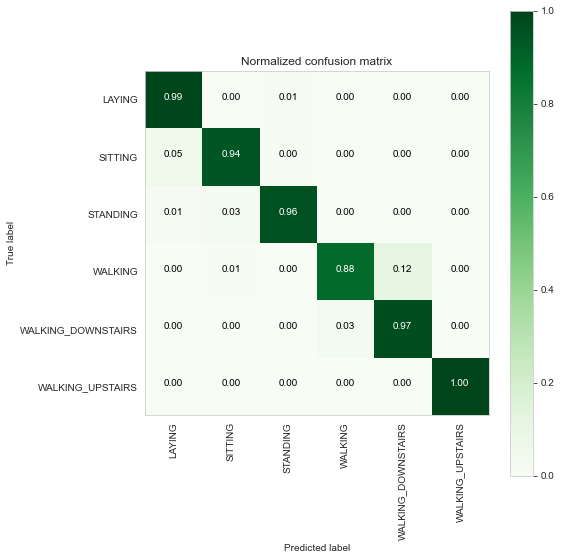

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           1       0.94      0.99      0.97       496
           2       0.96      0.94      0.95       471
           3       0.99      0.96      0.97       420
           4       0.96      0.88      0.92       491
           5       0.90      0.97      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [42]:
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train_dropped, y_train, X_test_dropped, y_test, class_labels=labels)

In [43]:
print_grid_search_attributes(rbf_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=16, tol=5e-05)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 16}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.945191618455676




### References

https://github.com/UdiBhaskar/Human-Activity-Recognition--Using-Deep-NN/blob/master/Human%20Activity%20Detection.ipynb